In [ ]:
def load_flowers_data():
    data_path = '/content/drive/Data_Rethinopathy/train_images'
    
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []

    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

In [ ]:
import tensorflow as tf

data_dir = '/content/drive/My Drive/Data_Retinopathy/raw_data/train_images'
batch_size = '100'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  # image_size=(img_height, img_width),
  batch_size=batch_size)

train_ds


# **Loading the data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHhXeh-2_Lgf-00BJynHYSlCcEP2n1x7LiF2MY9v0UrmyXnOX8G71o
Mounted at /content/drive/


In [8]:
from tqdm import tqdm
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [9]:
# image = Image.open('/content/drive/My Drive/Data_Retinopathy/raw_data/train_images/869bbd3170cc.jpg')

In [10]:
df_train = pd.read_csv('/content/drive/My Drive/Data_Retinopathy/raw_data/train.csv')

In [11]:
df_test = pd.read_csv('/content/drive/My Drive/Data_Retinopathy/raw_data/test.csv')

In [12]:
# os.listdir('/content/drive/My Drive/Data_Retinopathy/raw_data/train_images')

In [ ]:
%%time

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# image = tf.keras.preprocessing.image.load_img(image_path)
# input_arr = keras.preprocessing.image.img_to_array(image)

imgs_krs = []

pace = 100 
nb_iter = ( len(df_train) // pace ) + 1 

start_index = 0 
stop_index = pace 

for i in tqdm(range(0,nb_iter)):
  for image_path in df_train['id_code'][start_index:stop_index]:
    path = f'/content/drive/My Drive/Data_Retinopathy/raw_data/train_images/{image_path}'
    if os.path.exists(path): 
      image = load_img(path)
      imgs_krs.append(img_to_array(image))
  start_index = start_index + pace 
  stop_index = stop_index + pace
  print('len : ' + str(len(imgs_krs)) + ' , next_start :' + str(start_index) + ' , next stop : ' + str(stop_index))


In [ ]:
path = '/content/drive/My Drive/Data_Retinopathy/raw_data/train_images/'
pace = 100 
debug = True 

def fast_load_images(df_train, path, pace):
  imgs = []
  nb_iter = ( len(df_train) // pace ) + 1 
  
  start_index = 0 
  stop_index = pace 
  for i in tqdm(range(0,nb_iter)):
    for image_name in df_train['id_code'][start_index:stop_index]:
      image_path = path + image_name
      if os.path.exists(image_path): 
        image = Image.open(image_path)
        imgs.append(np.array(image))
    
    # Indentations 
    start_index = start_index + pace 
    stop_index = stop_index + pace
    
    if debug:
      print('len : ' + str(len(imgs)) + ' , next_start :' + str(start_index) + ' , next stop : ' + str(stop_index))

    X = np.array(imgs)
    return X 

fast_load_images(df_train, path, pace)

  3%|▎         | 1/37 [00:40<24:30, 40.83s/it]

len : 100 , next_start :100 , next stop : 200


  5%|▌         | 2/37 [01:26<24:42, 42.36s/it]

len : 200 , next_start :200 , next stop : 300


  8%|▊         | 3/37 [02:04<23:17, 41.11s/it]

len : 300 , next_start :300 , next stop : 400


 11%|█         | 4/37 [02:42<22:00, 40.01s/it]

len : 400 , next_start :400 , next stop : 500


 14%|█▎        | 5/37 [03:20<21:02, 39.44s/it]

len : 500 , next_start :500 , next stop : 600


 16%|█▌        | 6/37 [03:57<19:57, 38.63s/it]

len : 600 , next_start :600 , next stop : 700


 19%|█▉        | 7/37 [04:34<19:08, 38.27s/it]

len : 700 , next_start :700 , next stop : 800


 22%|██▏       | 8/37 [05:12<18:23, 38.06s/it]

len : 800 , next_start :800 , next stop : 900


 24%|██▍       | 9/37 [05:49<17:38, 37.82s/it]

len : 900 , next_start :900 , next stop : 1000


 27%|██▋       | 10/37 [06:26<16:51, 37.48s/it]

len : 1000 , next_start :1000 , next stop : 1100


 30%|██▉       | 11/37 [07:01<16:00, 36.93s/it]

len : 1100 , next_start :1100 , next stop : 1200


 32%|███▏      | 12/37 [07:37<15:13, 36.56s/it]

len : 1200 , next_start :1200 , next stop : 1300


 35%|███▌      | 13/37 [08:12<14:26, 36.09s/it]

len : 1300 , next_start :1300 , next stop : 1400


 38%|███▊      | 14/37 [08:47<13:41, 35.73s/it]

len : 1400 , next_start :1400 , next stop : 1500


 41%|████      | 15/37 [09:22<12:58, 35.40s/it]

len : 1500 , next_start :1500 , next stop : 1600


 43%|████▎     | 16/37 [09:59<12:33, 35.90s/it]

len : 1600 , next_start :1600 , next stop : 1700


 46%|████▌     | 17/37 [10:34<11:53, 35.67s/it]

len : 1700 , next_start :1700 , next stop : 1800


 49%|████▊     | 18/37 [11:08<11:10, 35.31s/it]

len : 1800 , next_start :1800 , next stop : 1900


 51%|█████▏    | 19/37 [11:43<10:31, 35.07s/it]

len : 1900 , next_start :1900 , next stop : 2000


 54%|█████▍    | 20/37 [12:18<09:59, 35.26s/it]

len : 2000 , next_start :2000 , next stop : 2100


 57%|█████▋    | 21/37 [12:56<09:37, 36.10s/it]

len : 2100 , next_start :2100 , next stop : 2200


 59%|█████▉    | 22/37 [13:33<09:01, 36.11s/it]

len : 2200 , next_start :2200 , next stop : 2300


 62%|██████▏   | 23/37 [14:08<08:22, 35.88s/it]

len : 2300 , next_start :2300 , next stop : 2400


 65%|██████▍   | 24/37 [14:44<07:45, 35.79s/it]

len : 2400 , next_start :2400 , next stop : 2500


 68%|██████▊   | 25/37 [15:18<07:05, 35.49s/it]

len : 2500 , next_start :2500 , next stop : 2600


 70%|███████   | 26/37 [15:53<06:27, 35.20s/it]

len : 2600 , next_start :2600 , next stop : 2700


 73%|███████▎  | 27/37 [16:29<05:54, 35.40s/it]

len : 2700 , next_start :2700 , next stop : 2800


In [ ]:
path = '/content/drive/My Drive/Data_Retinopathy/raw_data/train_images/'
pace = 100 
debug = True 

imgs = []
nb_iter = ( len(df_train) // pace ) + 1 

start_index = 0 
stop_index = pace 
for i in tqdm(range(0,nb_iter)):
  for image_name in df_train['id_code'][start_index:stop_index]:
    image_path = path + image_name
    if os.path.exists(image_path): 
      image = Image.open(image_path)
      imgs.append(np.array(image))
  
  start_index = start_index + pace 
  stop_index = stop_index + pace
  
  if debug:
    print('len : ' + str(len(imgs)) + ' , next_start :' + str(start_index) + ' , next stop : ' + str(stop_index))

  X = np.array(imgs)


In [23]:
%%time
X = np.array(imgs)

CPU times: user 341 ms, sys: 1.94 s, total: 2.28 s
Wall time: 2.3 s


In [14]:
X.shape

(3662, 480, 480, 3)

In [ ]:
# Save X 
# np.save('/content/drive/My Drive/Data_Retinopathy/X.npy',X) 

In [15]:
targets = df_train['diagnosis'] 
targets

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [16]:
pd.value_counts(targets)

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [17]:
y = to_categorical(targets, num_classes=5)
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [18]:
targets_mapping = { 
    0 : "No Diabetic Retinopathy",
    1 : "Mild Diabetic Retinopathy",
    2 : "Moderate Diabetic Retinopathy",
    3 : "Sever Diabetic Retinopathy",
    4 : "Proliferative Diabetic Retinopathy"
}

targets_mapping

{0: 'No Diabetic Retinopathy',
 1: 'Mild Diabetic Retinopathy',
 2: 'Moderate Diabetic Retinopathy',
 3: 'Sever Diabetic Retinopathy',
 4: 'Proliferative Diabetic Retinopathy'}

In [ ]:
# Shuffling 

p = np.random.permutation(len(X))
X, y = X[p], y[p]

# **Split**

In order to be able to assess the performance of the transfer learning model with VGG-16, we need to split the train data, as the test data given in the kaggle competition doesn't give. We'll need to retrain the model on the whole train dataset once we reach "satisfying" performances.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, stratify=y, random_state=8)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2563, 480, 480, 3)
(2563, 5)
(1099, 480, 480, 3)
(1099, 5)


# **Model** (Nhat)

In [28]:
#input model (Baseline model): Transfer learning= VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model

model = load_model()

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models

# model de classification adapté au Data Set
def update_model(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    # Add layers to the mdoel
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(5, activation='softmax')

    model = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    
    return model    

In [30]:
model = update_model(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 15, 15, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               57600500  
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2505      
Total params: 72,317,693
Trainable params: 57,603,005
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as metrics

#compile your model - we advise Adam 
def compile_model(model):
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy',metrics.Recall(name='recall')])

    return model

In [34]:
# Data augmentation
def build_model():
    
    model = load_model()
    model = update_model(model)
    model = compile_model(model)
    
    return model

model = build_model()

In [27]:
### Back to the data ###

In [35]:
%%time 
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(model, X_train, y_train, X_valid, y_valid, epochs, patience): 

  es = EarlyStopping(monitor='recall', mode='max', patience=patience, verbose=1, restore_best_weights=True)

  history = model.fit(X_train, y_train,
                      validation_data=(X_valid, y_valid),
                      epochs=epochs,
                      batch_size=16,
                      callbacks=[es])

Epoch 1/50
161/161 [==============================] - 32s 202ms/step - loss: 5.2171 - accuracy: 0.6383 - recall: 0.6200 - val_loss: 1.3500 - val_accuracy: 0.7088 - val_recall: 0.6970
Epoch 2/50
161/161 [==============================] - 31s 191ms/step - loss: 0.3806 - accuracy: 0.8705 - recall: 0.8533 - val_loss: 1.1270 - val_accuracy: 0.7207 - val_recall: 0.6943
Epoch 3/50
161/161 [==============================] - 31s 190ms/step - loss: 0.1659 - accuracy: 0.9536 - recall: 0.9481 - val_loss: 1.0033 - val_accuracy: 0.7425 - val_recall: 0.7197
Epoch 4/50
161/161 [==============================] - 31s 190ms/step - loss: 0.0900 - accuracy: 0.9840 - recall: 0.9832 - val_loss: 1.0319 - val_accuracy: 0.7416 - val_recall: 0.7197
Epoch 5/50
161/161 [==============================] - 31s 190ms/step - loss: 0.0930 - accuracy: 0.9856 - recall: 0.9848 - val_loss: 1.0955 - val_accuracy: 0.7270 - val_recall: 0.7025
Epoch 6/50
161/161 [==============================] - 31s 191ms/step - loss: 0.0780 -

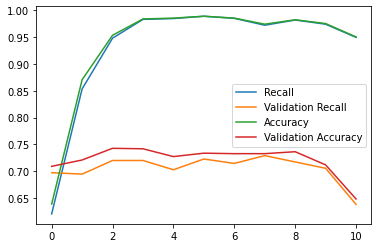

In [38]:
import matplotlib.pyplot as plt

def plot_recall(history):
  %matplotlib inline
  plt.plot(history.history['recall'], label="Recall")
  plt.plot(history.history['val_recall'], label = "Validation Recall")
  plt.legend()
  plt.show()

def plot_accuracy(history)
  %matplotlib inline
  plt.plot(history.history['accuracy'], label="Accuracy")
  plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
  plt.legend()
  plt.show()

<function matplotlib.pyplot.show>

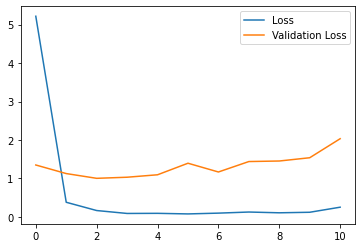

In [37]:
def plot_losses(history):
  plt.plot(history.history['loss'], label="Loss")
  plt.plot(history.history['val_loss'], label="Validation Loss")
  plt.legend()
  plt.show

In [ ]:
model.evaluate(X_valid, y_valid)
print(f'Chance level: {1./5*100:.4f}%')

18/18 [==============================] - 4s 233ms/step - loss: 2.0987 - accuracy: 0.7636
Chance level: 20.0000%
